# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read Dataset

In [2]:
df = pd.read_csv('Black friday sales EDA.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# 3. EDA step 1: Data Cleaning

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Following steps to be taken while fixing rows and columns.

    1. Delete unnecessary Rows and comlumns and rows 
    2. Delete header and footer notes
    3. if needed merge or split columns for better understanding of the data
    4. Make sure all columns are named
    

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [7]:
df.drop('User_ID', axis=1, inplace=True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.rename(columns={'User_ID': 'user_id', 'Product_ID': 'product_id', 'Gender': 'gender', 'Age': 'age', 'Occupation': 'occupation',
                   'City_Category': 'city_category','Stay_In_Current_City_Years': 'city_years', 
                   'Marital_Status': 'marital_status', 'Product_Category_1': 'p_cat_1', 'Product_Category_2': 'p_cat_2',
                   'Product_Category_3': 'p_cat_3', 'Purchase': 'purchase'}, inplace=True)

In [10]:
df.head()

,product_id,gender,age,occupation,city_category,city_years,marital_status,p_cat_1,p_cat_2,p_cat_3,purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df.age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64

In [12]:
df['age'].replace(r'^0-17$', 'child or teen', regex=True, inplace= True)
df['age'].replace(r'^18-25$', 'Young Adult', regex=True, inplace= True)
df['age'].replace(r'^26-35$', 'Adult  ', regex=True, inplace= True)
df['age'].replace(r'^36-45$', 'Adult  ', regex=True, inplace= True)
df['age'].replace(r'^46-50$', 'Middle Aged', regex=True, inplace= True)
df['age'].replace(r'^51-55$', 'Middle Aged', regex=True, inplace= True)
df['age'].replace(r'^55\+$', 'Sr.Citizen', regex=True, inplace= True)


In [13]:
df.age.value_counts()

Adult            329600
Young Adult       99660
Middle Aged       84202
Sr.Citizen        21504
child or teen     15102
Name: age, dtype: int64

# 3. EDA step 1: Missing Values

There are mainly 3 types of missing values.

    1. MCAR (Missing completely at random) - Thease values do not depend on any other features.
    2. MAR (Missing at Random) - These values may be dependent on some other features.
    3. MNAR (Missing not random) - These missing valuse have some reason for why they are missing.
    

In [14]:
df.isnull().sum()

product_id             0
gender                 0
age                    0
occupation             0
city_category          0
city_years             0
marital_status         0
p_cat_1                0
p_cat_2           173638
p_cat_3           383247
purchase               0
dtype: int64

In [15]:
df['p_cat_2'].fillna(0, inplace=True)

In [16]:
df['p_cat_3'].fillna(0, inplace=True)

In [17]:
df.head()

,product_id,gender,age,occupation,city_category,city_years,marital_status,p_cat_1,p_cat_2,p_cat_3,purchase
0,P00069042,F,child or teen,10,A,2,0,3,0.0,0.0,8370
1,P00248942,F,child or teen,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,child or teen,10,A,2,0,12,0.0,0.0,1422
3,P00085442,F,child or teen,10,A,2,0,12,14.0,0.0,1057
4,P00285442,M,Sr.Citizen,16,C,4+,0,8,0.0,0.0,7969


In [18]:
df.city_years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: city_years, dtype: int64

In [19]:
df['city_years'].replace(r'[+]', '', regex=True, inplace=True)

In [20]:
df.city_years.value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: city_years, dtype: int64

In [21]:
df.describe()

,occupation,marital_status,p_cat_1,p_cat_2,p_cat_3,purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [22]:
df.marital_status.value_counts()

0    324731
1    225337
Name: marital_status, dtype: int64

<AxesSubplot:xlabel='marital_status', ylabel='age'>

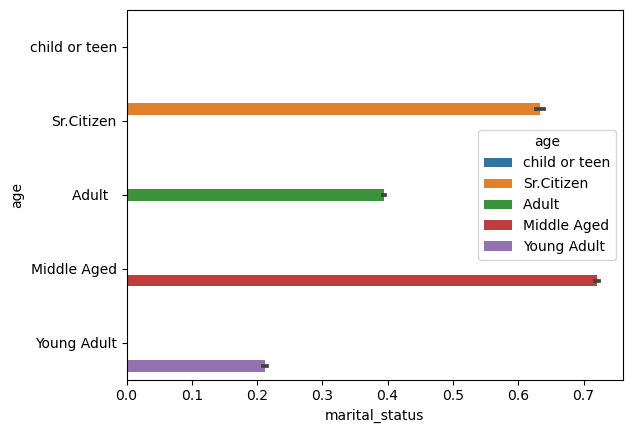

In [23]:
# sns.lineplot(x=df['marital_status'], y= df['age'], )

sns.barplot(x=df['marital_status'], y= df['age'],hue=df['age'])

In [42]:
ms=pd.DataFrame(df[df['age']=='Middle Aged'])
ms['marital_status'].value_counts()
# df.age.value_counts()

1    60673
0    23529
Name: marital_status, dtype: int64

In [43]:
df['marital_status'].replace(r'^0\+$', 'unmarried', regex=True, inplace= True)
df['marital_status'].replace(r'^1\+$', 'married', regex=True, inplace= True)

In [44]:
df.head(5)

,product_id,gender,age,occupation,city_category,city_years,marital_status,p_cat_1,p_cat_2,p_cat_3,purchase
0,P00069042,F,child or teen,10,A,2,0,3,0.0,0.0,8370
1,P00248942,F,child or teen,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,child or teen,10,A,2,0,12,0.0,0.0,1422
3,P00085442,F,child or teen,10,A,2,0,12,14.0,0.0,1057
4,P00285442,M,Sr.Citizen,16,C,4,0,8,0.0,0.0,7969


In [60]:
a = {'0': 'Not Married',
    '1': 'Married'}
df['marital_status'].dtype

df['marital_status'].replace({0: 'Not Married', 1: 'Married'}, inplace=True)
df.head()


,product_id,gender,age,occupation,city_category,city_years,marital_status,p_cat_1,p_cat_2,p_cat_3,purchase
0,P00069042,F,child or teen,10,A,2,Not Married,3,0.0,0.0,8370
1,P00248942,F,child or teen,10,A,2,Not Married,1,6.0,14.0,15200
2,P00087842,F,child or teen,10,A,2,Not Married,12,0.0,0.0,1422
3,P00085442,F,child or teen,10,A,2,Not Married,12,14.0,0.0,1057
4,P00285442,M,Sr.Citizen,16,C,4,Not Married,8,0.0,0.0,7969


In [64]:
df.isna().sum()

product_id        0
gender            0
age               0
occupation        0
city_category     0
city_years        0
marital_status    0
p_cat_1           0
p_cat_2           0
p_cat_3           0
purchase          0
dtype: int64

In [73]:
df[df.duplicated()]
df.drop_duplicates()
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

# Visualization

<AxesSubplot:xlabel='purchase', ylabel='Count'>

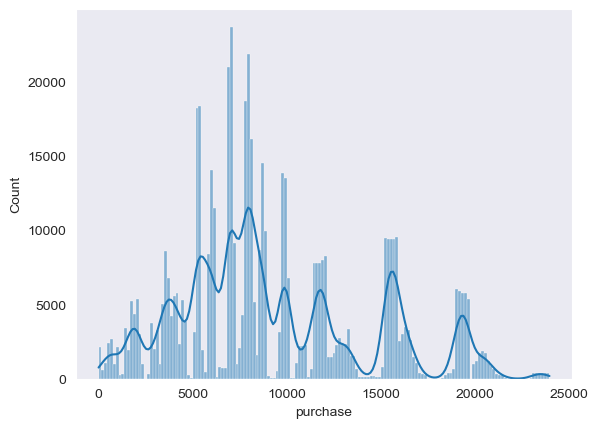

In [79]:
sns.set_style('dark')
sns.histplot(data=df['purchase'], kde=True)

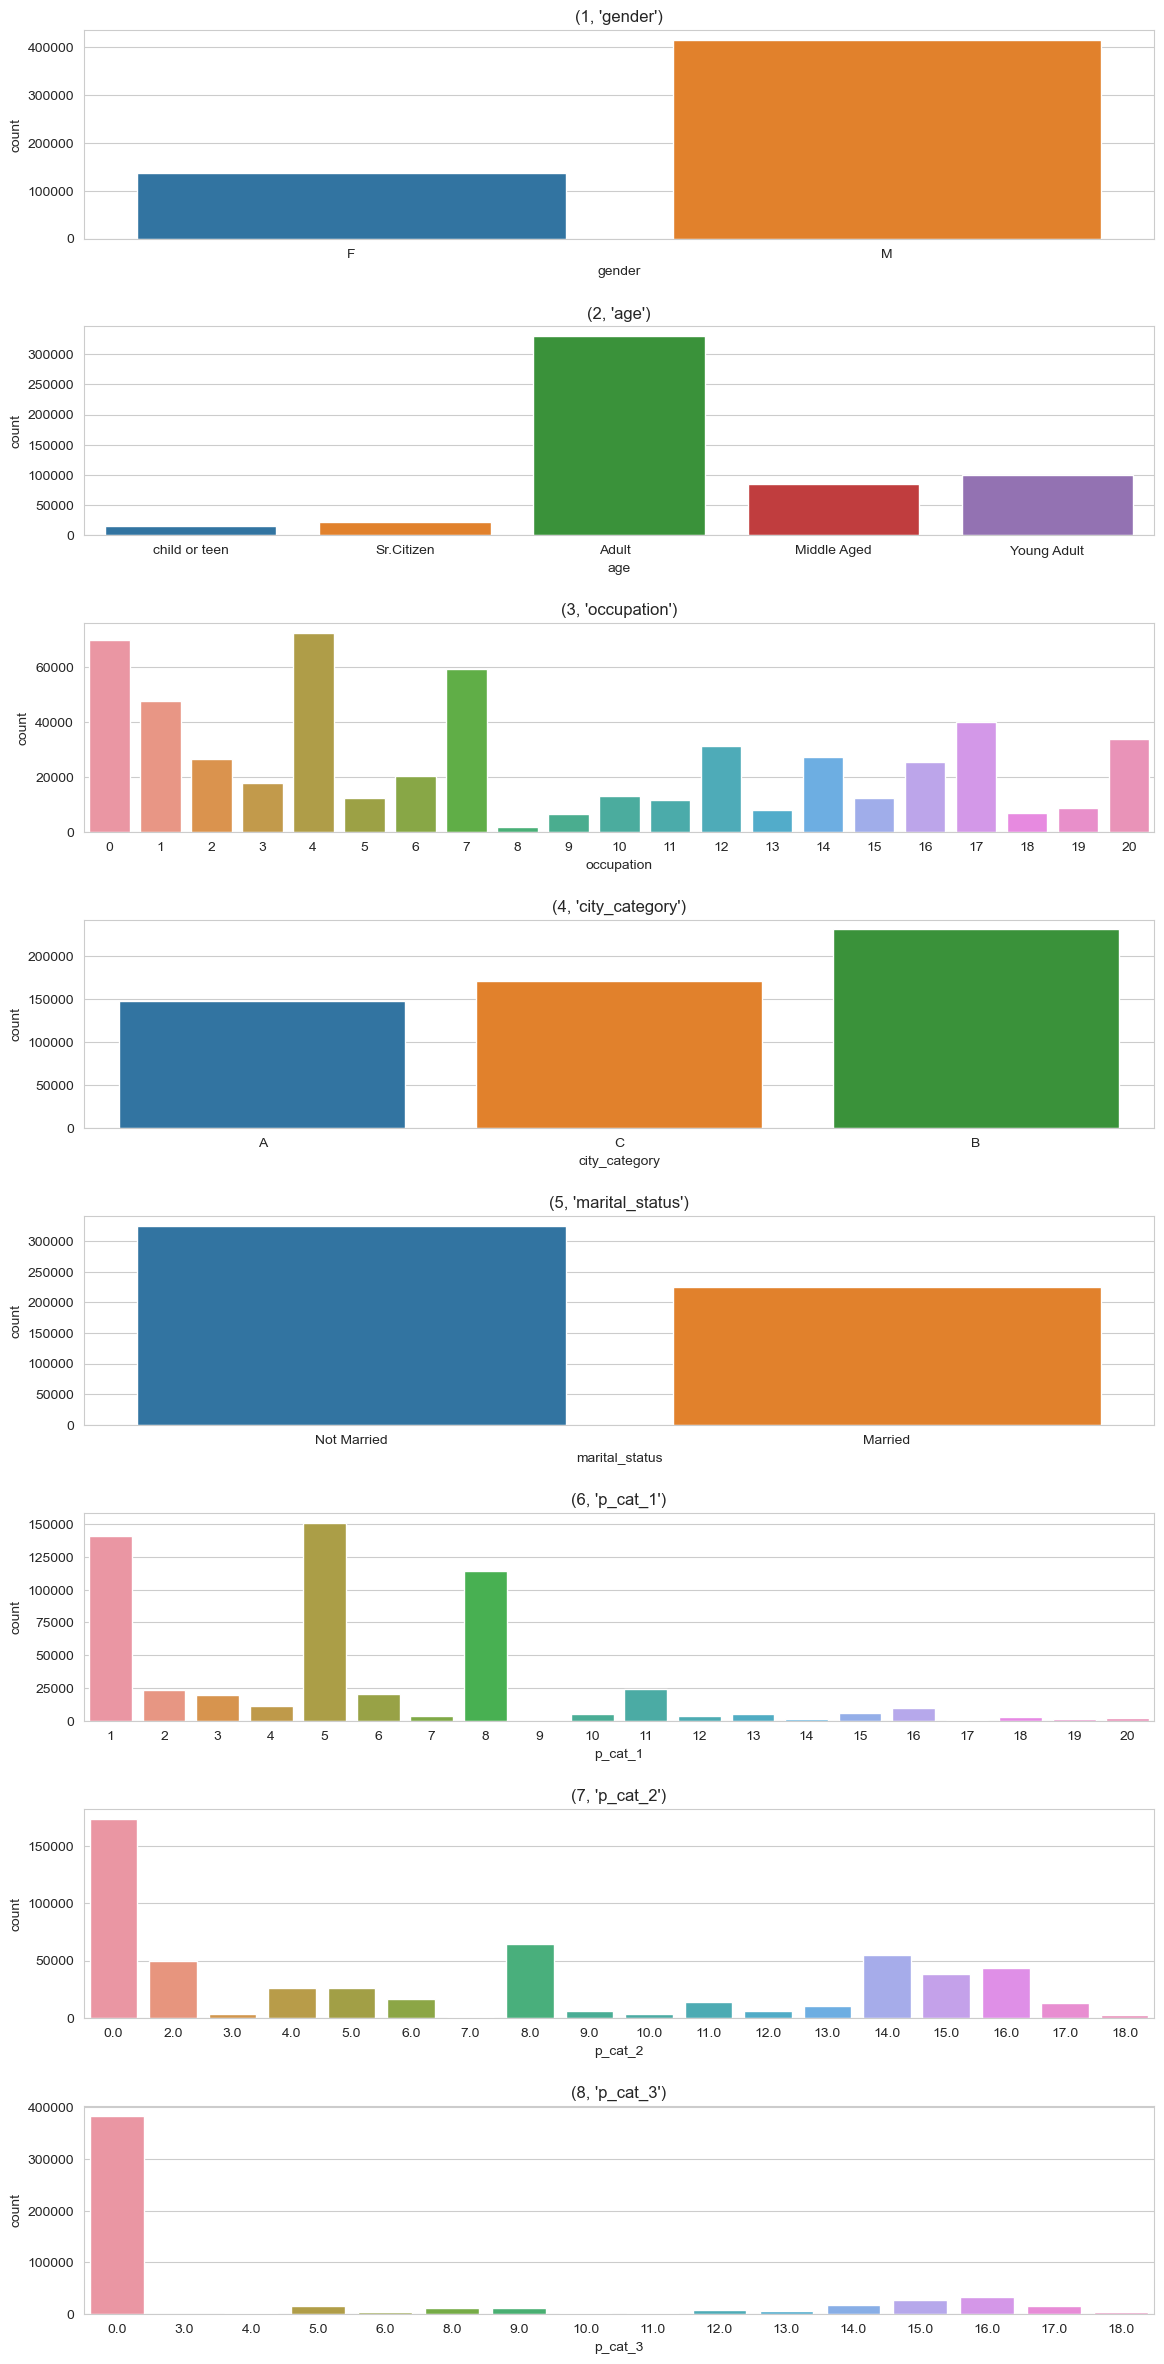

In [92]:
def single_col_count(list1):
    fig,axes=plt.subplots(nrows=len(list1),ncols=1,figsize=(12,24))
    sns.set_style("whitegrid")

    for l in enumerate(list1):  
        s = sns.countplot(ax=axes[l[0]],x=df[l[1]])
        s.set_title((l[0]+1,l[1]))
        
    plt.tight_layout(pad=2)

list1 = ['gender','age','occupation','city_category','marital_status','p_cat_1','p_cat_2','p_cat_3']   
single_col_count(list1)

### Observations

1. Male ratio is more than females
2. Adults are more
3. Occ of 0, 1,4,7,17 are more
4. people from city B are more
5. Unmarried are more


In [98]:
import plotly.express as px
comparision = df.groupby('age').agg({'purchase': 'mean'}).reset_index()
display(comparision)

,age,purchase
0,Adult,9278.945576
1,Middle Aged,9357.771157
2,Sr.Citizen,9336.280459
3,Young Adult,9169.663606
4,child or teen,8933.464640


<AxesSubplot:xlabel='age', ylabel='purchase'>

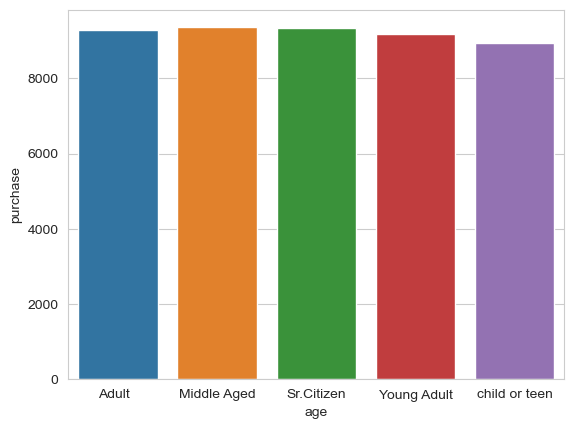

In [99]:
sns.barplot(data=comparision, x= 'age', y='purchase')

In [104]:
f=px.bar(comparision, y= 'age', x='purchase')
f.show()

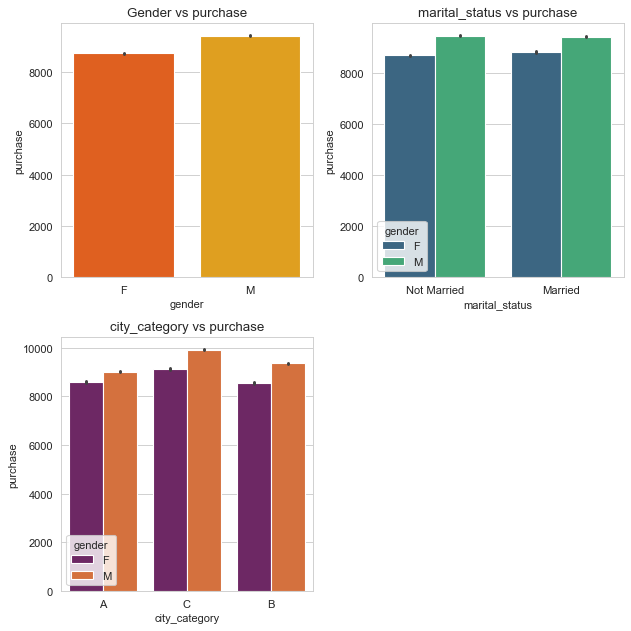

In [112]:
plt.figure(figsize=(8,8), dpi=80)
plt.subplot(2,2,1)
plt.title('Gender vs purchase')
sns.barplot(x='gender', y='purchase', data=df, palette='autumn')

plt.subplot(2,2,2)
plt.title('marital_status vs purchase')
sns.barplot(x='marital_status', y='purchase',  hue= 'gender', data=df, palette='viridis')


plt.subplot(2,2,3)
plt.title('city_category vs purchase')
sns.barplot(x='city_category', y='purchase', hue= 'gender', data=df, palette='inferno')

plt.tight_layout()
plt.show()


In [113]:
comparisions = df.groupby(['age', 'gender', 'marital_status', 'occupation']).agg({'purchase': 'mean'}).reset_index()

<AxesSubplot:xlabel='occupation', ylabel='purchase'>

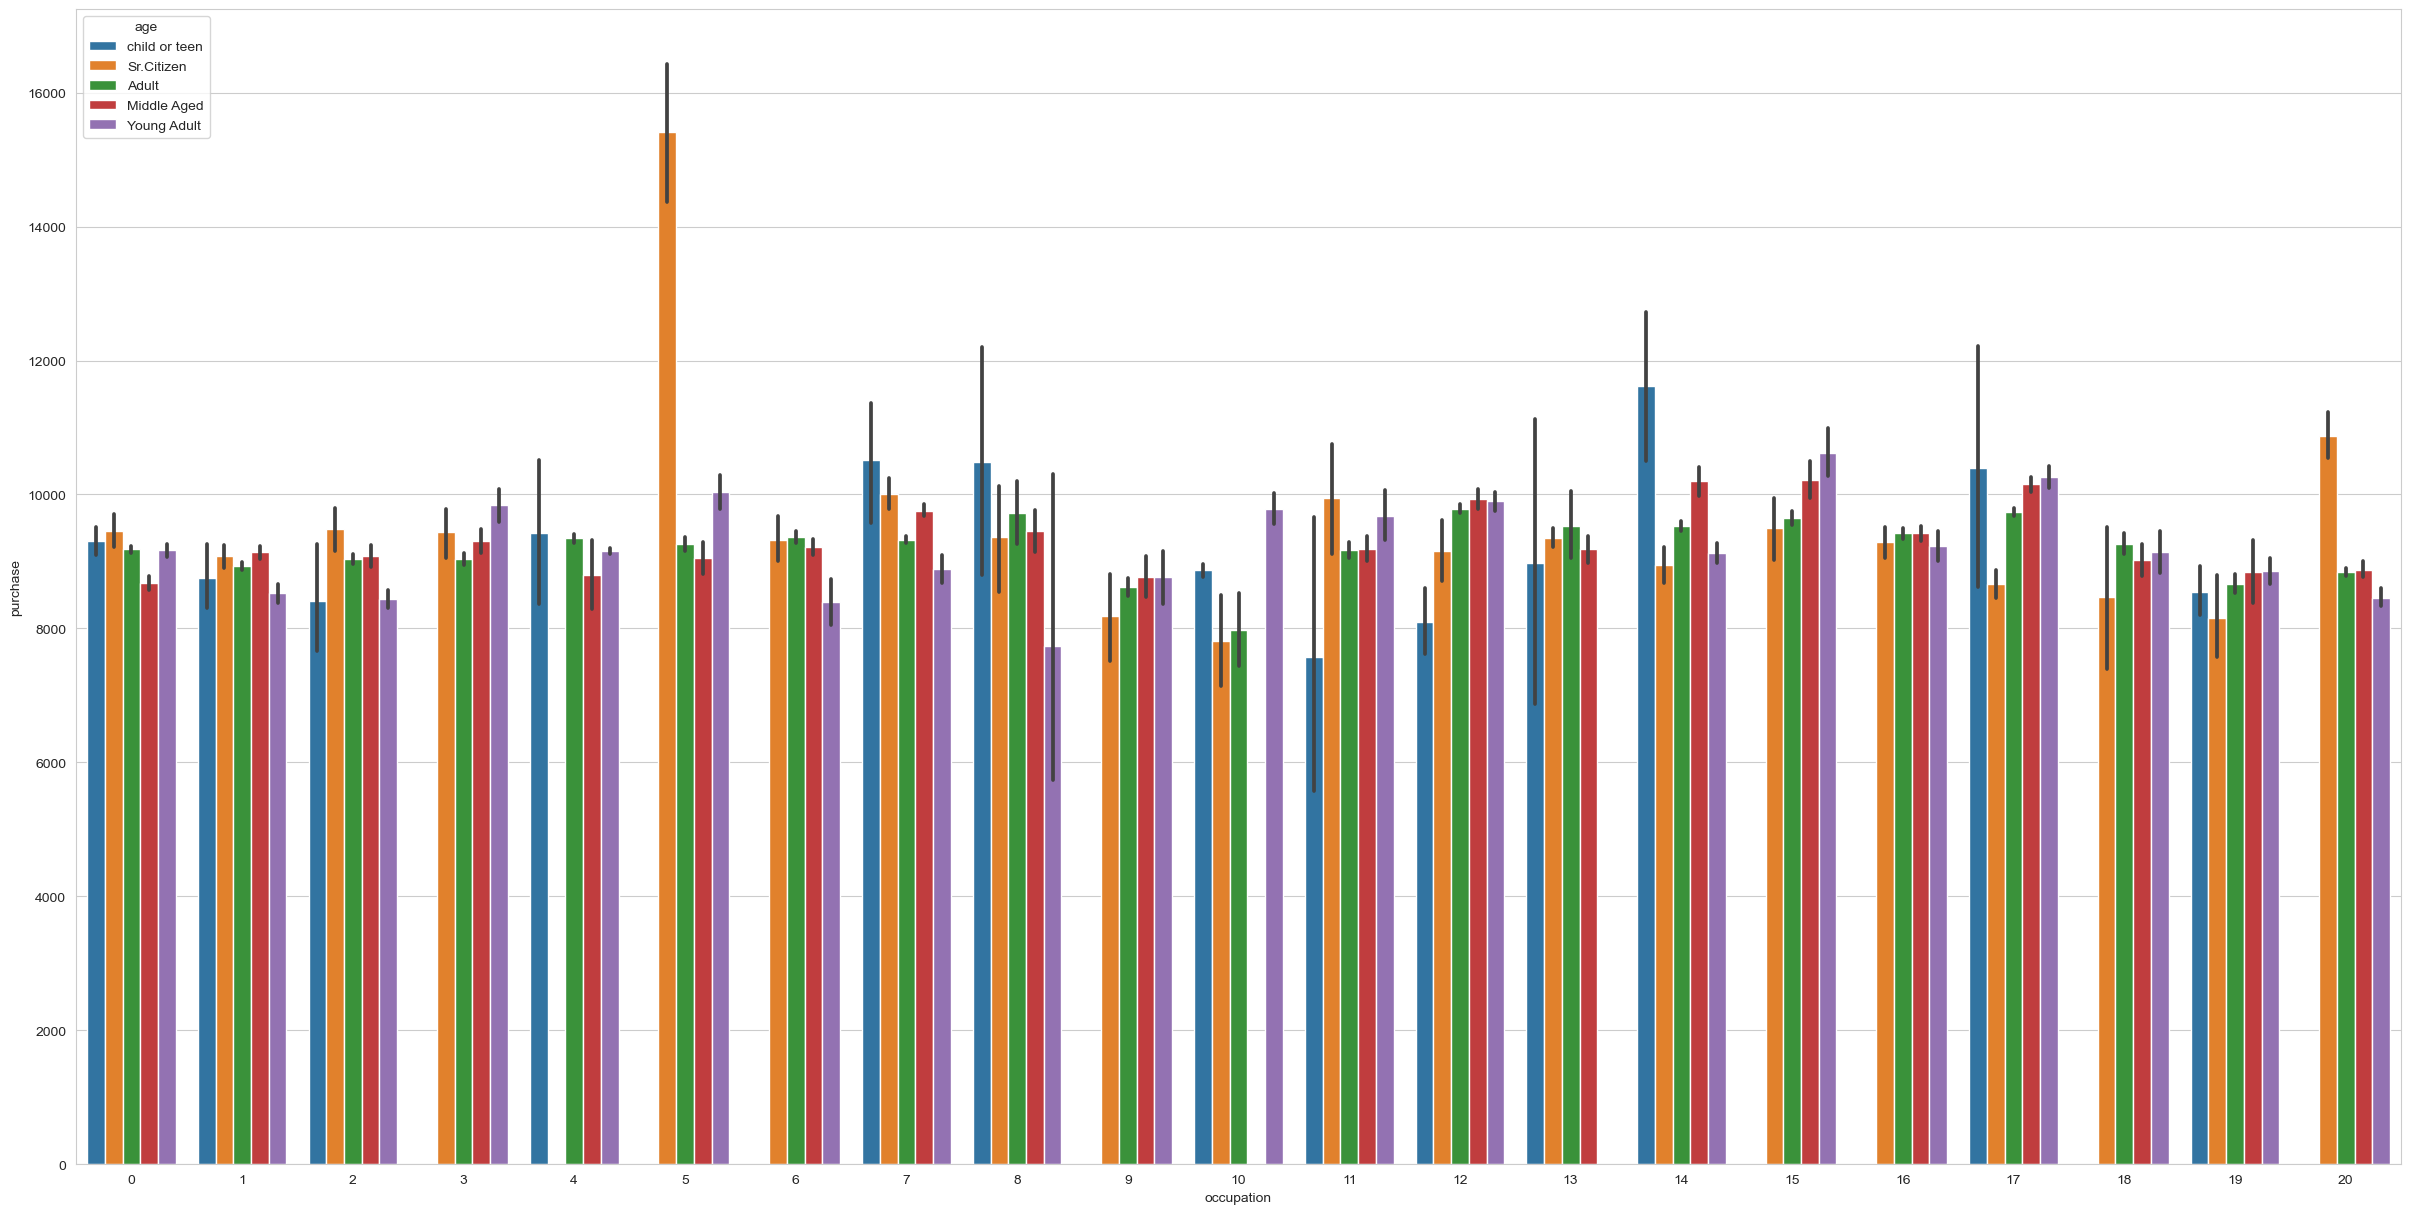

In [115]:
plt.figure(figsize=(30,15))
sns.set_style('whitegrid')
sns.barplot(data=df, y='purchase', x='occupation', hue='age')

<AxesSubplot:xlabel='occupation', ylabel='purchase'>

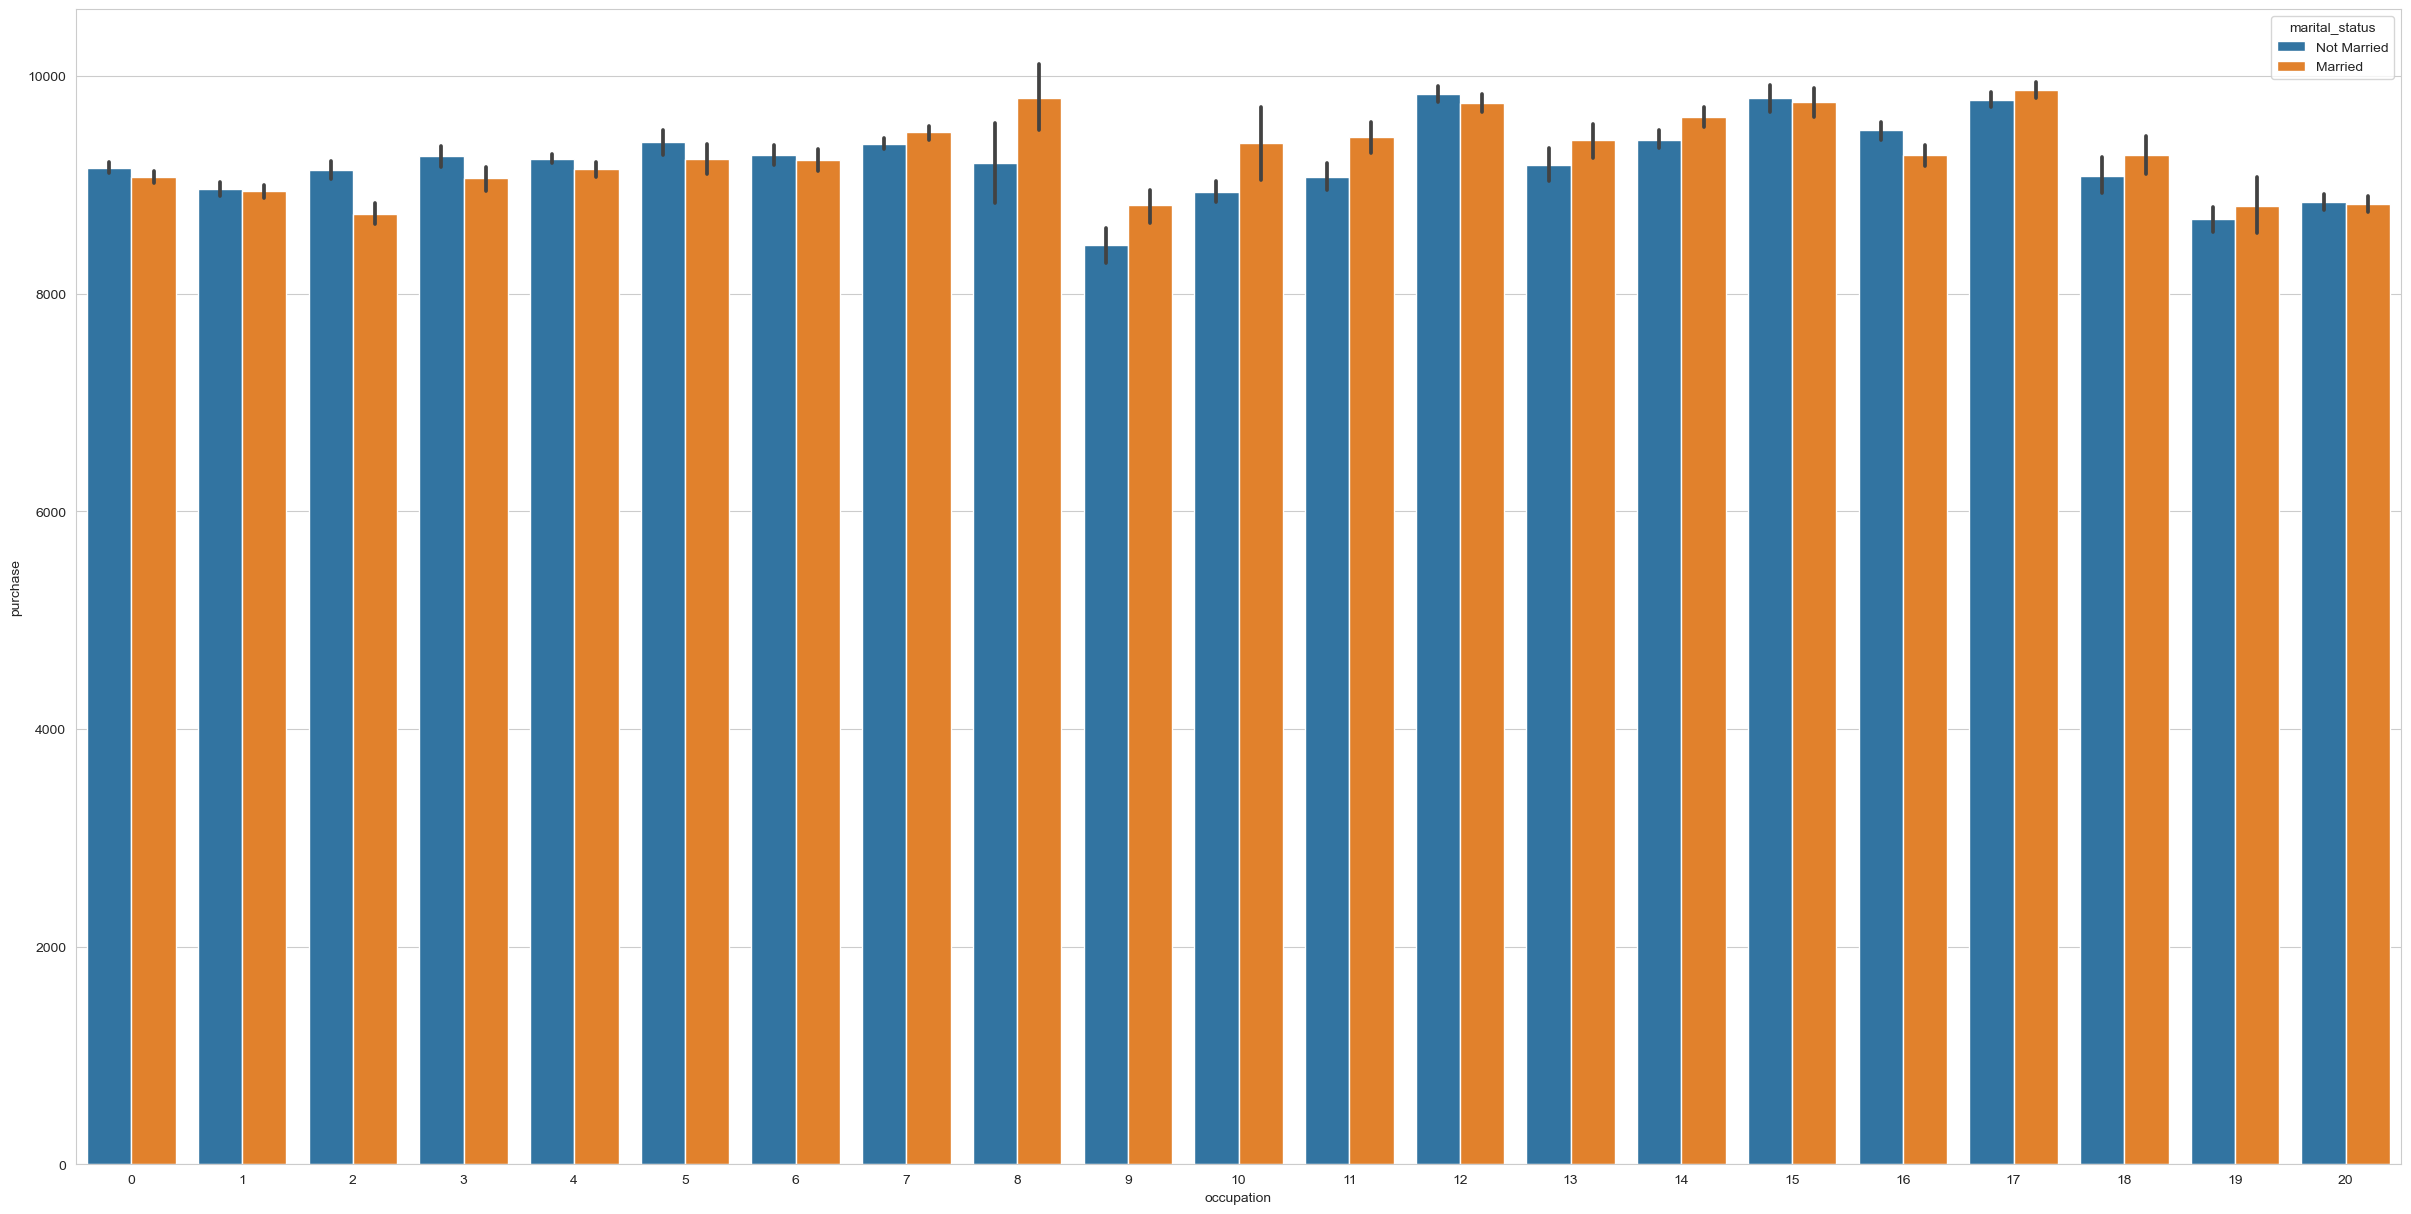

In [116]:
plt.figure(figsize=(30,15))
sns.set_style('whitegrid')
sns.barplot(data=df, y='purchase', x='occupation', hue='marital_status')

<AxesSubplot:xlabel='occupation', ylabel='purchase'>

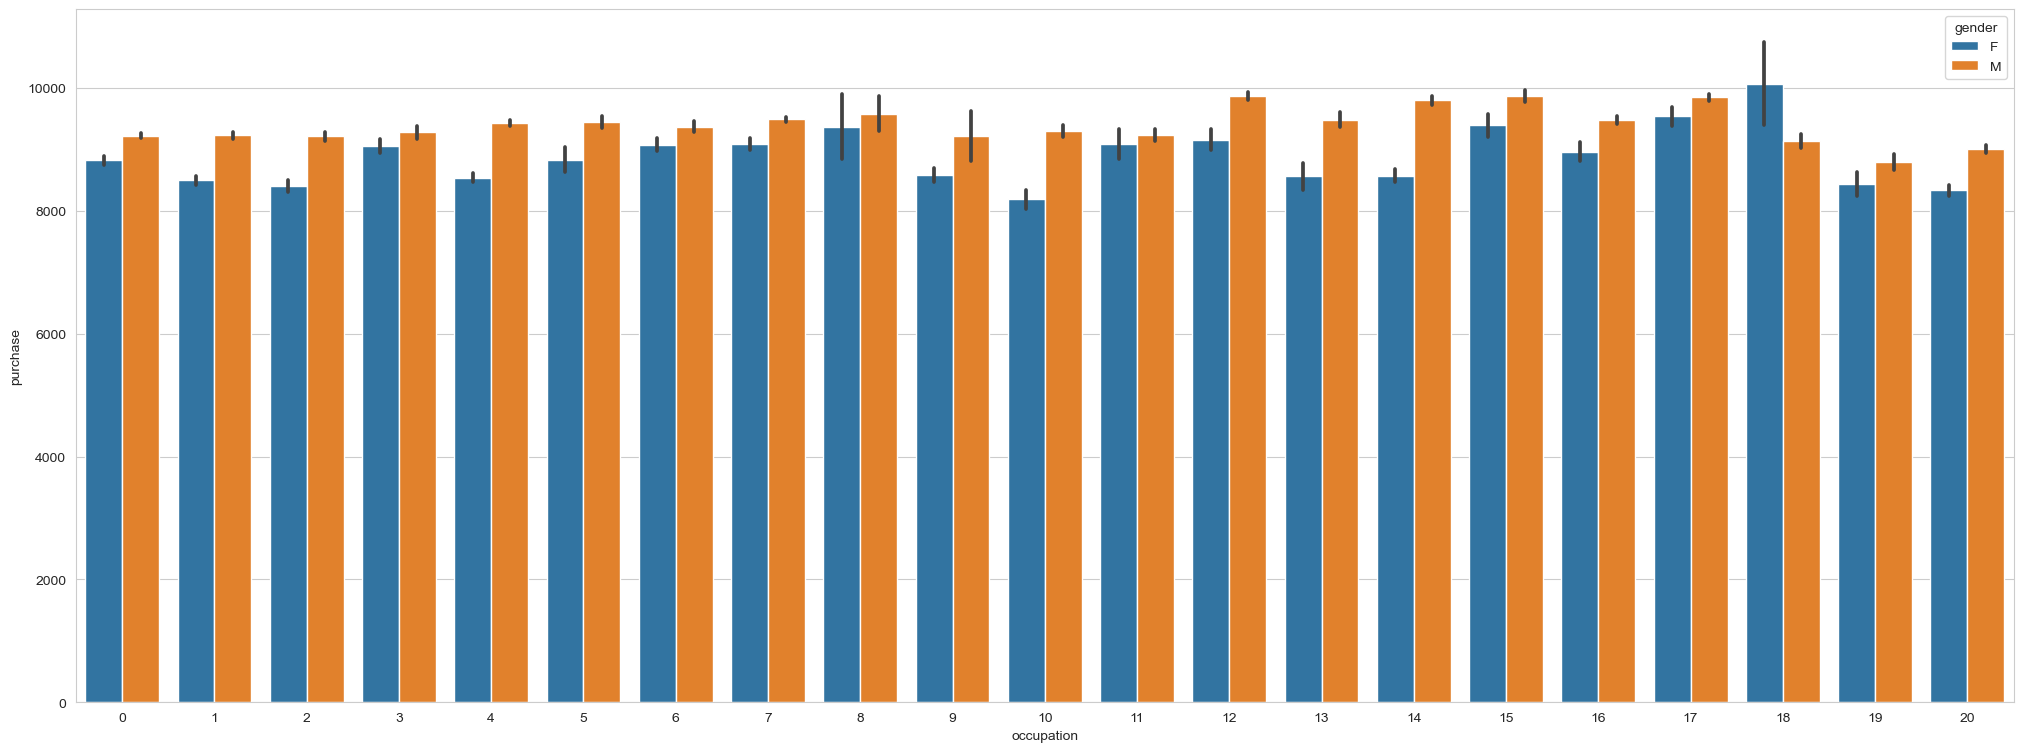

In [117]:
plt.figure(figsize=(25,9))
sns.set_style("whitegrid")
sns.barplot(data=df,y='purchase',x='occupation',hue='gender')

<AxesSubplot:title={'center':'P1 vs Purchase'}, xlabel='p_cat_1', ylabel='purchase'>

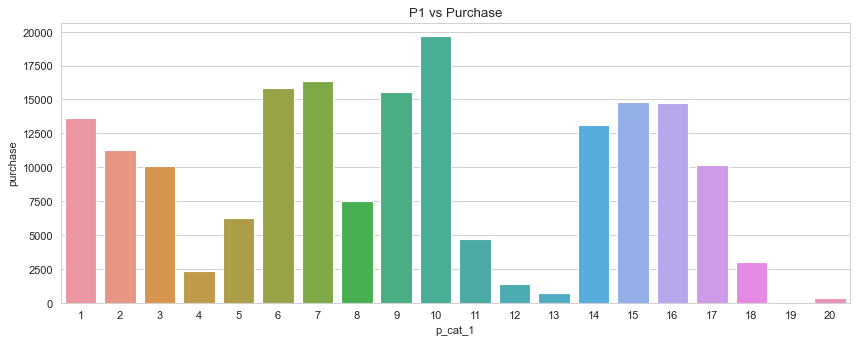

In [138]:
compare = df.groupby('p_cat_1').agg({'purchase': 'mean'}).reset_index()

plt.figure(figsize=(28,10), dpi=80)
plt.subplot(2,2,1)
plt.title('P1 vs Purchase' )
sns.barplot(data=compare,x='p_cat_1',y='purchase')

<AxesSubplot:title={'center':'P2 vs Purchase'}, xlabel='p_cat_2', ylabel='purchase'>

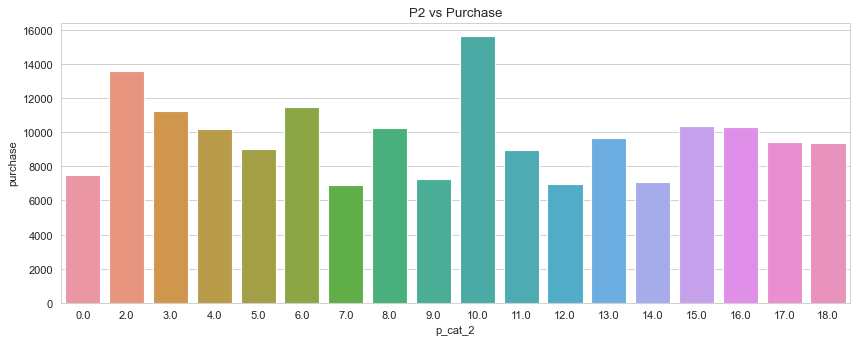

In [139]:
compare = df.groupby('p_cat_2').agg({'purchase': 'mean'}).reset_index()

plt.figure(figsize=(28,10), dpi=80)
plt.subplot(2,2,1)
plt.title('P2 vs Purchase' )
sns.barplot(data=compare,x='p_cat_2',y='purchase')

<AxesSubplot:title={'center':'P3 vs Purchase'}, xlabel='p_cat_3', ylabel='purchase'>

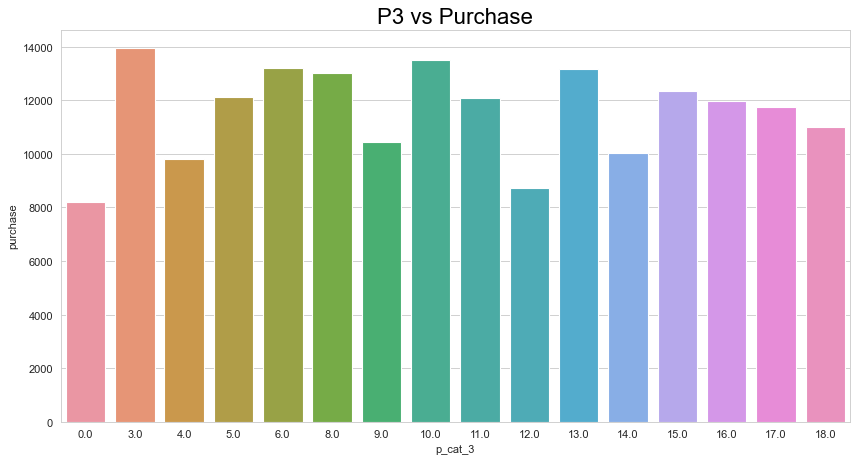

In [151]:
compare = df.groupby('p_cat_3').agg({'purchase': 'mean'}).reset_index()

plt.figure(figsize=(28,14), dpi=80)
plt.subplot(2,2,1)
plt.title('P3 vs Purchase', fontdict= {'fontsize': '20',
                                      'color': 'black'})

sns.barplot(data=compare,x='p_cat_3',y='purchase')

Text(0.5, 1.0, 'City Category Distribution')

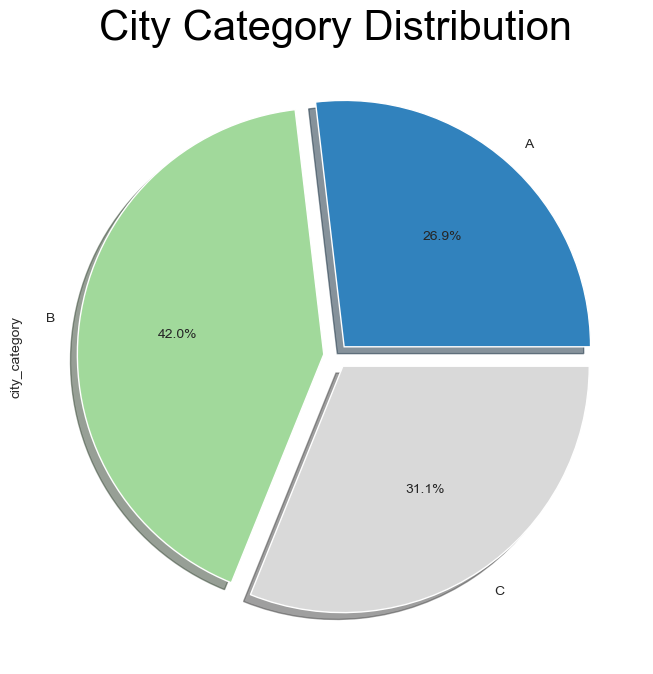

In [160]:
city = df.groupby('city_category')['city_category'].agg('count')

city.plot(subplots=True, kind = 'pie', figsize = (8,8),cmap = 'tab20c', shadow=True, autopct='%.1f%%', explode=(0.05,0.05,0.05),)

plt.title('City Category Distribution', fontdict={'fontsize': '30',
                                      'color': 'black'})

In [152]:
df.head()

,product_id,gender,age,occupation,city_category,city_years,marital_status,p_cat_1,p_cat_2,p_cat_3,purchase
0,P00069042,F,child or teen,10,A,2,Not Married,3,0.0,0.0,8370
1,P00248942,F,child or teen,10,A,2,Not Married,1,6.0,14.0,15200
2,P00087842,F,child or teen,10,A,2,Not Married,12,0.0,0.0,1422
3,P00085442,F,child or teen,10,A,2,Not Married,12,14.0,0.0,1057
4,P00285442,M,Sr.Citizen,16,C,4,Not Married,8,0.0,0.0,7969
